In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/workspaces/Laptop_Price_Predictor/data/raw/laptop_data.csv')

In [79]:
df.shape



(3976, 18)

In [80]:
df.head()


,Unnamed: 0,Brand,Name,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
0,0,HP,HP Chromebook 11A-NA0002MU (2E4N0PA) Laptop (1...,22990,MediaTek Octa-core,MediaTek,Not Expandable,4 GB,DDR4 RAM,2.0 Ghz Processor,LED,11.6,Integrated Graphics,MediaTek,64 GB SSD Storage,No HDD,45,Upto 12 Hrs Battery Life
1,1,Lenovo,Lenovo Ideapad Slim 3 (82KU017KIN) Laptop (15....,36289,AMD Hexa-Core Ryzen 5,AMD,12 GB Expandable,8 GB,DDR4 RAM,4.0 Ghz Processor,LCD,15.6,Radeon,AMD,512 GB SSD Storage,No HDD,65,Upto 11 Hrs Battery Life
2,3,Dell,Dell G15-5520 (D560822WIN9B) Laptop (15.6 Inch...,78500,Intel Core i5 (12th Gen),Intel,32 GB Expandable,16 GB,DDR5 RAM,3.3 Ghz Processor,LCD,15.6,"GeForce RTX 3050 GPU, 4 GB",NVIDIA,512 GB SSD Storage,No HDD,56,Upto 10 Hrs Battery Life
3,4,HP,HP 15s-fy5007TU (91R03PA) Laptop (15.6 Inch | ...,55490,Intel Core i5 (12th Gen),Intel,8 GB Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,Iris Xe,Intel,512 GB SSD Storage,No HDD,no,Upto 7.30 Hrs Battery Life
4,6,Infinix,Infinix Inbook Y2 Plus XL29 Laptop (15.6 Inch ...,21990,Intel Core i3 (11th Gen),Intel,Not Expandable,8 GB LP,LPDDR4X RAM,1.7 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,45,Upto 8 Hrs Battery Life


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3976 entries, 0 to 3975
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       3976 non-null   int64 
 1   Brand            3976 non-null   object
 2   Name             3976 non-null   object
 3   Price            3976 non-null   int64 
 4   Processor_Name   3976 non-null   object
 5   Processor_Brand  3976 non-null   object
 6   RAM_Expandable   3976 non-null   object
 7   RAM              3976 non-null   object
 8   RAM_TYPE         3976 non-null   object
 9   Ghz              3976 non-null   object
 10  Display_type     3976 non-null   object
 11  Display          3976 non-null   object
 12  GPU              3968 non-null   object
 13  GPU_Brand        3972 non-null   object
 14  SSD              3976 non-null   object
 15  HDD              3976 non-null   object
 16  Adapter          3976 non-null   object
 17  Battery_Life     3558 non-null   

In [82]:
df.isnull().sum()

Unnamed: 0           0
Brand                0
Name                 0
Price                0
Processor_Name       0
Processor_Brand      0
RAM_Expandable       0
RAM                  0
RAM_TYPE             0
Ghz                  0
Display_type         0
Display              0
GPU                  8
GPU_Brand            4
SSD                  0
HDD                  0
Adapter              0
Battery_Life       418
dtype: int64

In [83]:
df = df.drop(['Unnamed: 0', 'Name'], axis=1)

In [84]:
df = df.drop_duplicates() #Remove duplicates columns

In [85]:
df.describe(include='all')

,Brand,Price,Processor_Name,Processor_Brand,RAM_Expandable,RAM,RAM_TYPE,Ghz,Display_type,Display,GPU,GPU_Brand,SSD,HDD,Adapter,Battery_Life
count,3949,3949.000000,3949,3949,3949,3949,3949,3949,3949,3949,3941,3945,3949,3949,3949,3531
unique,31,NaN,125,19,10,20,19,31,2,34,300,11,19,8,68,191
top,ASUS,NaN,Intel Core i5 (11th Gen),Intel,Not Expandable,8 GB,DDR4 RAM,4.2 Ghz Processor,LCD,15.6,UHD,Intel,512 GB SSD Storage,No HDD,65,65W Adapter
freq,976,NaN,316,2986,2141,1601,1495,330,2016,2189,644,1922,1915,2993,1451,799
mean,NaN,72437.915422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,52285.617467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,7990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,39853.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,58990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,84990.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.dtypes

Brand              object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object

['HP' 'Lenovo' 'Dell' 'Infinix' 'Acer' 'ASUS' 'Tecno' 'Xiaomi' 'MSI'
 'Samsung' 'Apple' 'Realme' 'AVITA' 'Zebronics' 'Honor' 'Fujitsu' 'Wings'
 'LG' 'Gigabyte' 'Microsoft' 'Razer' 'Coconics' 'Huawei' 'Micromax'
 'iball' 'Lava' 'VAIO' 'Smartron' 'Colorful' 'Nokia' 'RDP']

Brand
ASUS         976
Lenovo       808
HP           799
Dell         420
Acer         317
MSI          316
Samsung       61
Apple         48
Infinix       39
Microsoft     33
AVITA         23
Gigabyte      17
LG            15
Honor         14
iball         11
Xiaomi        10
Fujitsu        8
Zebronics      8
Wings          4
Colorful       3
Realme         3
Micromax       3
Coconics       3
Tecno          2
Smartron       2
Huawei         1
Razer          1
VAIO           1
Lava           1
Nokia          1
RDP            1
Name: count, dtype: int64


/tmp/ipykernel_2471/1034153304.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Brand',data=df, palette='Set2')


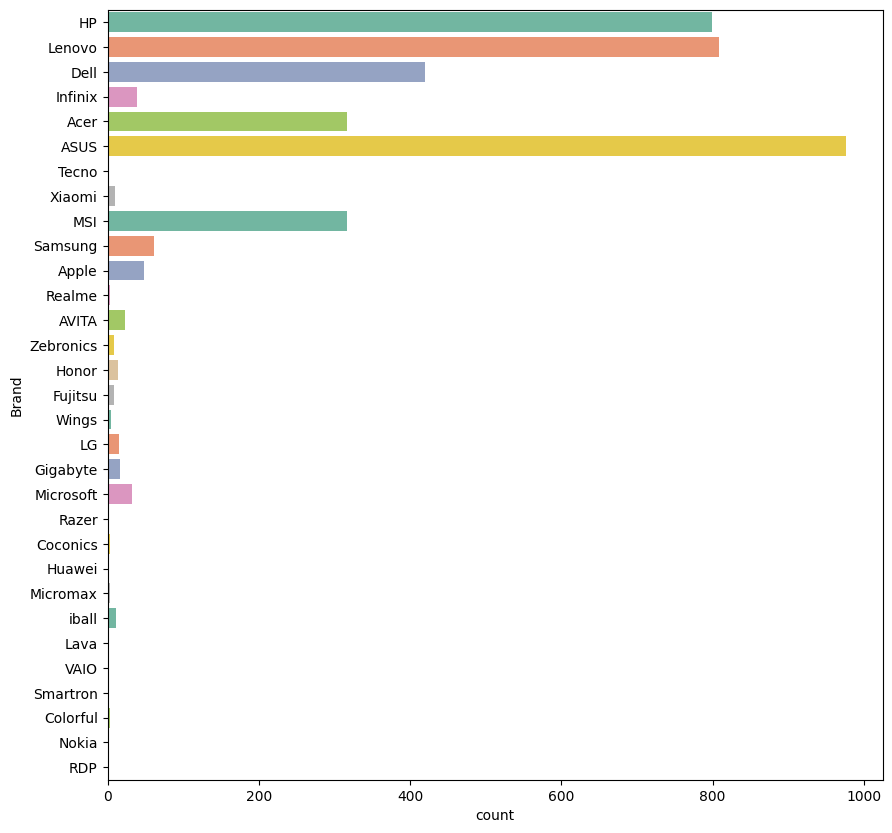

In [97]:
#Visualization of Brand
print(f"{df['Brand'].unique()}\n")
print(df['Brand'].value_counts())

plt.figure(figsize=(10,10))
sns.countplot(y='Brand',data=df, palette='Set2')
plt.show()

['MediaTek' 'AMD' 'Intel' 'Apple' '2.3' '3.4' 'Qualcomm' '3.3' '1.6' '2.4'
 '3.0' '2.2' '1.7' '2.0' '2.1' '1.8' 'Microsoft' '1.9' '2.6']

Processor_Brand
Intel        2986
AMD           916
Apple          20
MediaTek        4
1.7             4
2.4             2
3.4             2
2.0             2
2.1             2
3.0             2
Qualcomm        1
3.3             1
1.6             1
2.3             1
2.2             1
1.8             1
Microsoft       1
1.9             1
2.6             1
Name: count, dtype: int64


/tmp/ipykernel_2471/1909818431.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Processor_Brand',data=df, palette='Set2')


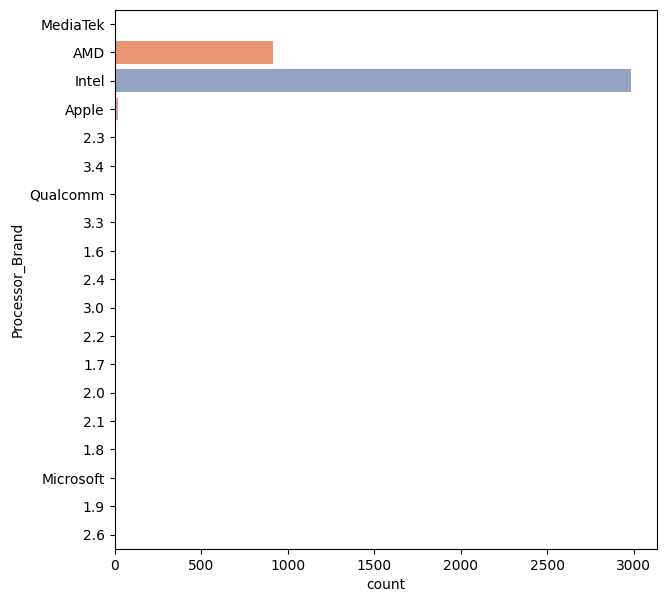

In [105]:
print(f"{df['Processor_Brand'].unique()}\n")
print(df['Processor_Brand'].value_counts())

plt.figure(figsize=(7, 7))
sns.countplot(y='Processor_Brand',data=df, palette='Set2')
plt.show()

[' DDR4 RAM' ' DDR4 RAM ' ' DDR5 RAM ' ' LPDDR4X RAM' ' LPDDR5X RAM '
 ' LPDDR5 RAM' ' LPDDR4 RAM' ' DDR5 RAM' ' LPDDR5X RAM' ' LPDDR5 RAM '
 ' LPDDR4X RAM ' ' LPDDR3 RAM' ' RAM' ' RAM ' ' LPDDR4 RAM ' ' DDR3 RAM'
 ' DDR3 RAM ' ' LPDDR3 RAM ' ' DDR2 RAM']

RAM_TYPE
DDR4 RAM        1495
DDR4 RAM        1311
DDR5 RAM         244
DDR5 RAM         144
LPDDR5 RAM       140
LPDDR4X RAM      121
LPDDR5 RAM        97
DDR3 RAM          87
DDR3 RAM          68
LPDDR3 RAM        48
LPDDR5X RAM       42
LPDDR4X RAM       37
LPDDR5X RAM       36
RAM               35
LPDDR4 RAM        28
LPDDR4 RAM         8
RAM                5
LPDDR3 RAM         2
DDR2 RAM           1
Name: count, dtype: int64


/tmp/ipykernel_2471/3220435396.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='RAM_TYPE',data=df, palette='Set2')


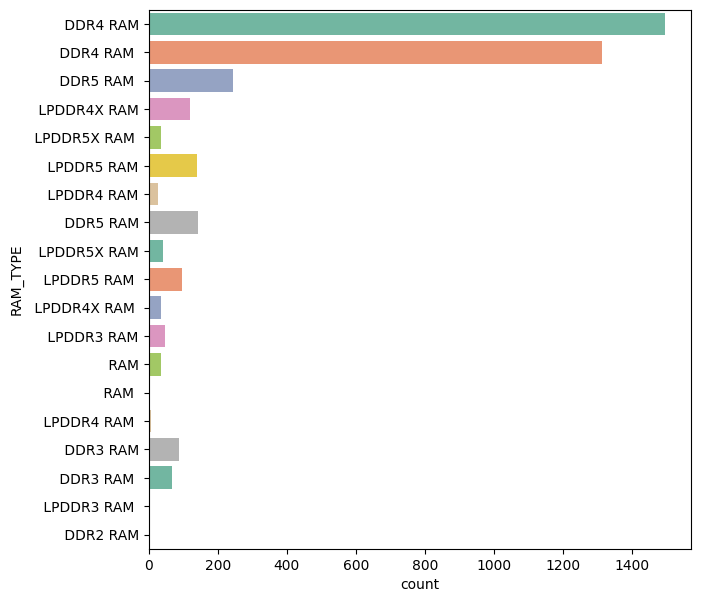

In [100]:
#Visualization of RAM types
print(f"{df['RAM_TYPE'].unique()}\n")
print(df['RAM_TYPE'].value_counts())

plt.figure(figsize=(7,7))
sns.countplot(y='RAM_TYPE',data=df, palette='Set2')
plt.show()

['LED' 'LCD']

Display_type
LCD    2016
LED    1933
Name: count, dtype: int64


/tmp/ipykernel_2471/1066916995.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Display_type',data=df, palette='Set2')


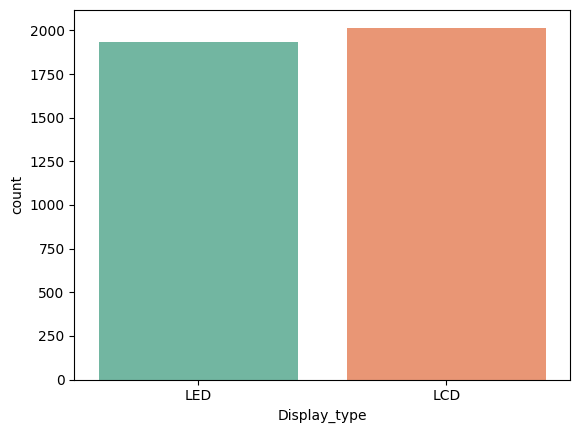

In [101]:
print(f"{df['Display_type'].unique()}\n")
print(df['Display_type'].value_counts())

sns.countplot(x='Display_type',data=df, palette='Set2')
plt.show()

In [91]:
df.dtypes


Brand              object
Price               int64
Processor_Name     object
Processor_Brand    object
RAM_Expandable     object
RAM                object
RAM_TYPE           object
Ghz                object
Display_type       object
Display            object
GPU                object
GPU_Brand          object
SSD                object
HDD                object
Adapter            object
Battery_Life       object
dtype: object

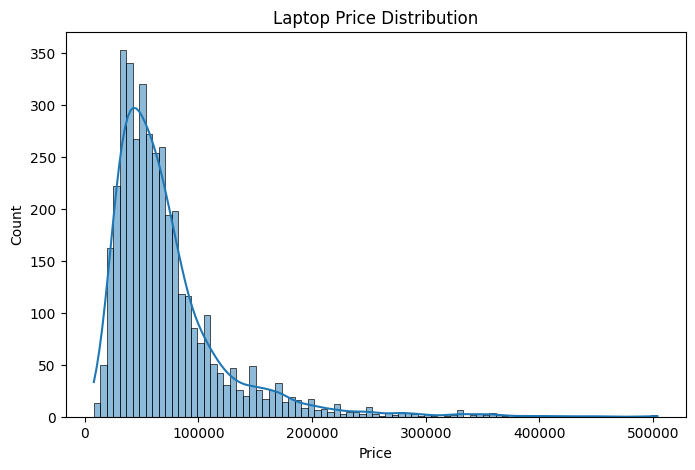

In [92]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title('Laptop Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()
